In [1]:
import numpy as np
import utils 

# Caricamento dei datasets row

In [2]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

# Caricamento dataset in due dataframe, uno per nome, uno per path

In [2]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [3]:
df_paths, df_names

(                                               FilePath
 0     Dataset/Target/Acoustic Harassment Devices/AHD...
 1            Dataset/Target/Tug/20171128c-28_190038.wav
 2            Dataset/Target/Tug/20171227a-66_110853.wav
 3            Dataset/Target/Tug/20171127a-24_105442.wav
 4                 Dataset/Target/Tug/20171210-49_49.wav
 ...                                                 ...
 2658  Dataset/Non-Target/Fin, Finback Whale/6104700F...
 2659  Dataset/Non-Target/Fin, Finback Whale/61064009...
 2660  Dataset/Non-Target/Fin, Finback Whale/6106400O...
 2661  Dataset/Non-Target/Fin, Finback Whale/SanctSou...
 2662  Dataset/Non-Target/Red grouper/SanctSound_FK03...
 
 [2663 rows x 1 columns],
                                                FileName
 0                                        AHD_Airmar.wav
 1                               20171128c-28_190038.wav
 2                               20171227a-66_110853.wav
 3                               20171127a-24_105442.wav
 4 

# Ricerca ed eliminazione dei duplicati

In [4]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

{'72021005.wav': [681, 2520], '7202100T.wav': [680, 2519], '7202100V.wav': [676, 2518], '7202100Z.wav': [707, 2527], '7702800U.wav': [1377, 2349], '7702800V.wav': [1384, 2358], '7702800X.wav': [1422, 2402], '7702801F.wav': [1379, 2351], '7702801M.wav': [1410, 2395], '78018002.wav': [702, 2525], '78018003.wav': [701, 2524], '7801800B.wav': [692, 2523], '7801800D.wav': [703, 2526], '7801800H.wav': [682, 2521], '7801800J.wav': [675, 2517], '84016002.wav': [2235, 2392], '8401600B.wav': [2251, 2399], '84021003.wav': [2342, 2429], '91012009.wav': [1875, 2368], '9101200B.wav': [1893, 2393], '9101200K.wav': [1871, 2361], '9101201E.wav': [1886, 2388], '91012022.wav': [1877, 2382], '91012048.wav': [1907, 2417], '91012049.wav': [1908, 2418]}


# Salvataggio del dizionario in un file json

In [5]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

# Eliminazione duplicati

In [6]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [7]:
df_names, df_paths

(                                               FileName
 0                                        AHD_Airmar.wav
 1                               20171128c-28_190038.wav
 2                               20171227a-66_110853.wav
 3                               20171127a-24_105442.wav
 4                                    20171210-49_49.wav
 ...                                                 ...
 2658                                       6104700F.wav
 2659                                       61064009.wav
 2660                                       6106400O.wav
 2661   SanctSound_SB03_05_finwhale_20190923T074930Z.wav
 2662  SanctSound_FK03_01_redgrouper_20190201T054658Z...
 
 [2636 rows x 1 columns],
                                                FilePath
 0     Dataset/Target/Acoustic Harassment Devices/AHD...
 1            Dataset/Target/Tug/20171128c-28_190038.wav
 2            Dataset/Target/Tug/20171227a-66_110853.wav
 3            Dataset/Target/Tug/20171127a-24_105442.wav
 4 

In [10]:
#TODO: dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
#TODO: Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

# Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [8]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [9]:
audio_durations

[6.501587301587302,
 330.0,
 644.0,
 1750.0,
 190.0,
 636.0,
 921.0,
 400.0,
 240.0,
 866.0,
 773.0,
 534.0,
 200.0,
 233.0,
 654.0,
 387.0,
 674.0,
 1199.0,
 860.0,
 497.0,
 718.0,
 786.0,
 861.0,
 770.0,
 576.0,
 602.0,
 656.0,
 546.0,
 573.0,
 1147.0,
 730.0,
 400.0,
 739.0,
 653.0,
 310.0,
 348.0,
 263.0,
 662.0,
 508.0,
 326.0,
 614.0,
 516.0,
 564.0,
 630.0,
 460.0,
 203.0,
 370.0,
 350.0,
 1032.0,
 567.0,
 746.0,
 1051.0,
 626.0,
 336.0,
 390.0,
 263.0,
 889.0,
 357.0,
 723.0,
 612.0,
 334.0,
 612.0,
 813.0,
 531.0,
 389.0,
 267.0,
 290.0,
 504.0,
 417.0,
 931.0,
 439.0,
 303.0,
 440.0,
 221.0,
 200.0,
 300.0,
 279.0,
 300.0,
 347.0,
 276.0,
 10.518639455782314,
 667.0,
 538.0,
 339.0,
 351.0,
 360.0,
 357.0,
 383.0,
 537.0,
 229.0,
 373.0,
 559.0,
 291.0,
 370.0,
 543.0,
 341.0,
 186.0,
 500.0,
 464.0,
 568.0,
 202.0,
 540.0,
 196.0,
 465.0,
 344.0,
 37.151927437641724,
 368.0,
 226.0,
 498.0,
 382.0,
 442.0,
 336.0,
 378.0,
 361.0,
 250.0,
 736.0,
 297.0,
 354.0,
 372.0,
 395.

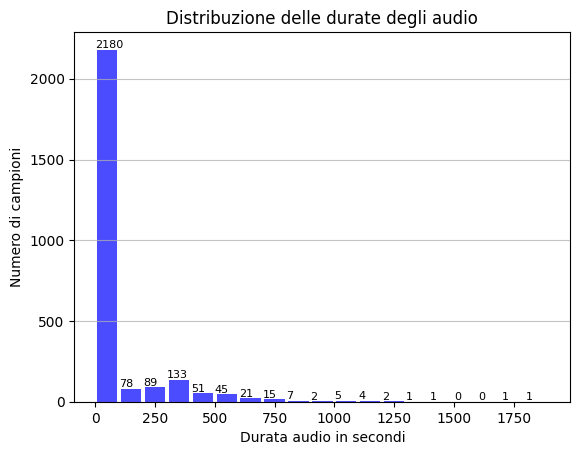

In [10]:
utils.plot_durations(audio_durations)

In [11]:
import pandas as pd

# Converti audio_durations in una serie pandas
audio_durations_series = pd.Series(audio_durations)

# Ottieni il summary
summary = audio_durations_series.describe()

print(summary)

count    2636.000000
mean       75.677078
std       174.742339
min         0.000000
25%         1.417969
50%         3.387257
75%        34.250042
max      1887.000000
dtype: float64


Dopo aver fatto l'analisi delle durate, visto il valore di mediana pari a 3,48 secondi, si può decidere di tagliare gli audio a 3,5 secondi

# Analisi delle frequenze
### Frequenze di campionamento

2000 200000
600 384000


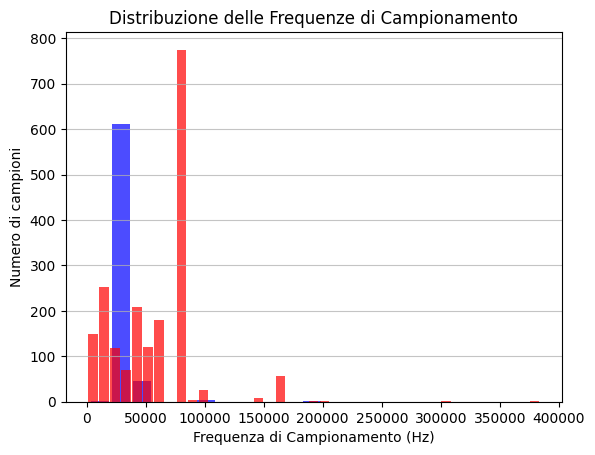

In [12]:
#TODO: analisi per il resembling shannon Nyquist 
#TODO: da modificare --> non prendere i duplicati 
frequenciesTarget,frequenciesNonTarget = utils.get_frequencies('Dataset/df_paths.csv')
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

## Analisi frequenze massime per audio

In [13]:
audio_files = utils.get_audio_files('Dataset/df_paths.csv')

In [14]:
max_frequencies = utils.analyze_max_frequencies(audio_files)

Skipping Dataset/Target/Seismic airguns surveys/airguns.mp3 because it's too short
Skipping Dataset/Target/Vessel/ship_small.mp3 because it's too short
Skipping Dataset/Target/Vessel/rhb_arrival.mp3 because it's too short
Skipping Dataset/Non-Target/Southern Elephant Seal/Sth-elephant-seal-ia-male-pulsed.mp3 because it's too short
Skipping Dataset/Non-Target/Killer Whale/d708efda-0bef-4399-b256-b5346836405c.mp3 because it's too short
Skipping Dataset/Non-Target/Humpback Whale/akhumphi1x.mp3 because it's too short
Skipping Dataset/Non-Target/Earthquake/earthquake_sound (1).mp3 because it's too short
Skipping Dataset/Non-Target/Minke Whale/atlminke10x (1).mp3 because it's too short
Skipping Dataset/Non-Target/Minke Whale/64104005.wav because it's too short
Skipping Dataset/Non-Target/Minke Whale/64104004.wav because it's too short
Skipping Dataset/Non-Target/Minke Whale/64104006.wav because it's too short
Skipping Dataset/Non-Target/Minke Whale/64104003.wav because it's too short
Skippin

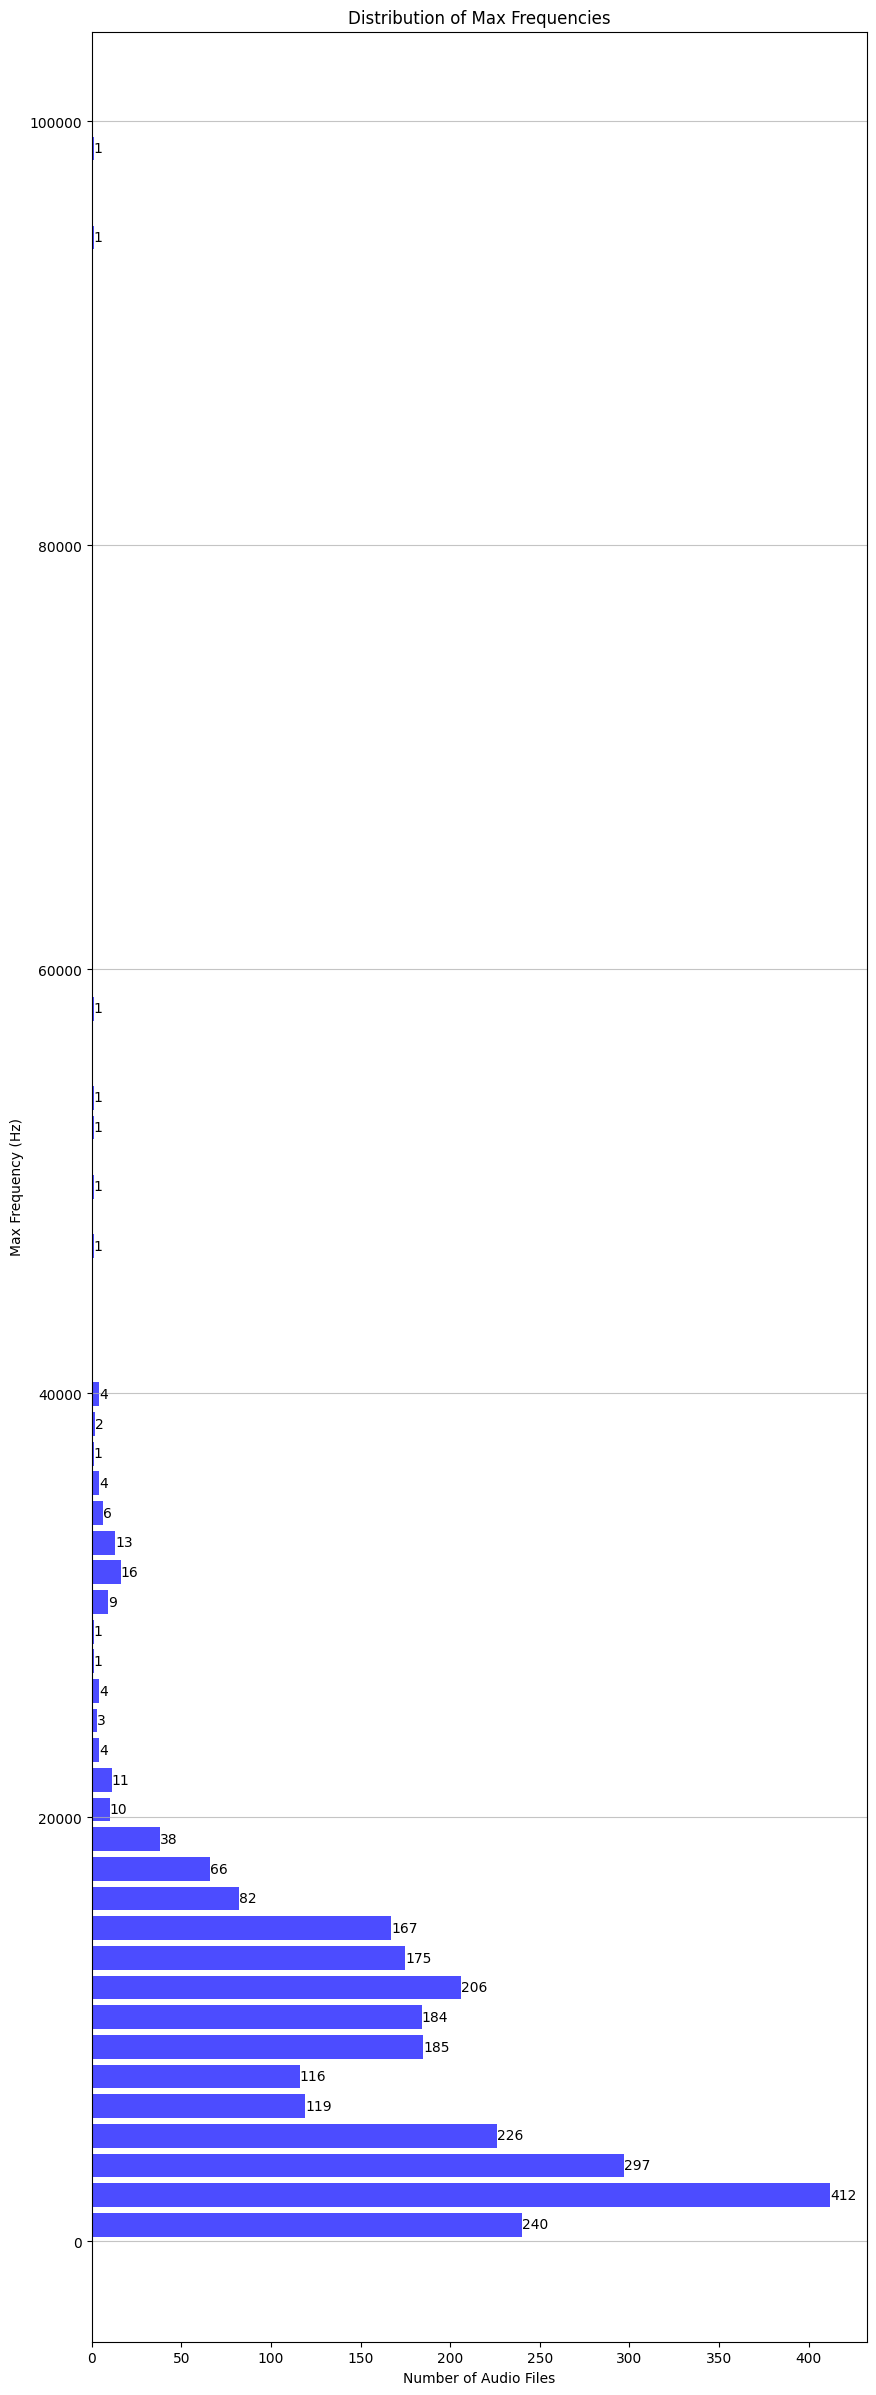

In [19]:
utils.plot_max_frequencies(max_frequencies)

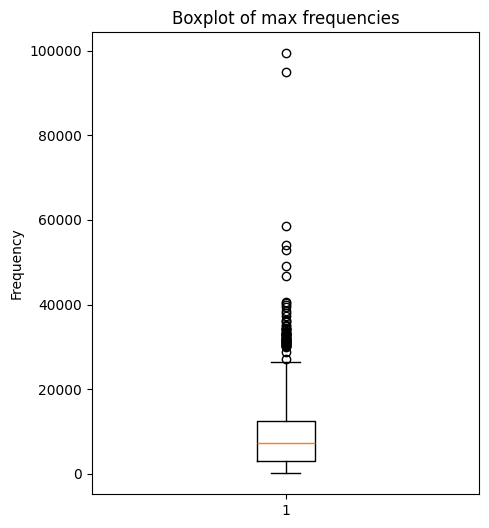

In [21]:
utils.boxplot_max_frequencies(max_frequencies)

In [20]:
import pandas as pd

# Converti audio_durations in una serie pandas
audio_frequencies_series = pd.Series(max_frequencies)

# Ottieni il summary
summary = audio_frequencies_series.describe()

print(summary)

count     2609.000000
mean      8448.739714
std       7241.347894
min         83.251688
25%       2889.585068
50%       7176.723905
75%      12521.751224
max      99417.572209
dtype: float64


Tenendo conto del teorema di Nyquist, si può decidere di fare resampling a 192KHz (198KHz). Abbiamo deciso di utilizzare il doppio del massimo, come consigliato dal teorema di Nyquist.

# Analisi della distribuzione del numero di Canali Audio

Files with 2 channels:
Dataset/Target/Acoustic Harassment Devices/AHD_Airmar.wav
Dataset/Target/Cargo/Cargo-Ship-at-20-knts.wav
Dataset/Target/Passengership/1cc5583b-fe72-4cb2-b64c-563bd87ad91b.mp3
Dataset/Target/Underwater Communication Signals/HLF-5-Active-Sonar.wav
Dataset/Target/Underwater Communication Signals/M-Sequence-communication-sonar.wav
Dataset/Target/Sonar/LFA-Sonar-Simulation.wav
Dataset/Target/Seismic airguns surveys/airguns.mp3
Dataset/Target/Seismic airguns surveys/Airgun-and-Echosounders.wav
Dataset/Target/Vessel/ship_small.mp3
Dataset/Target/Vessel/rhb_arrival.mp3
Dataset/Target/Vessel/Merchant-Ship-passing-at-1-mile.wav
Dataset/Target/Seafloor fossil fuel processing/SeaFloorProcessing.wav
Dataset/Non-Target/Black Drum/Black-Drum.wav
Dataset/Non-Target/Atlantic croaker/Croaker.wav
Dataset/Non-Target/Bearded Seal/Bearded_Seal.wav
Dataset/Non-Target/Perch/SeaPerch.wav
Dataset/Non-Target/Ringed Seal/Ringed-Seal-2.wav
Dataset/Non-Target/Northern fur seal/Ant-fur-seal-pu

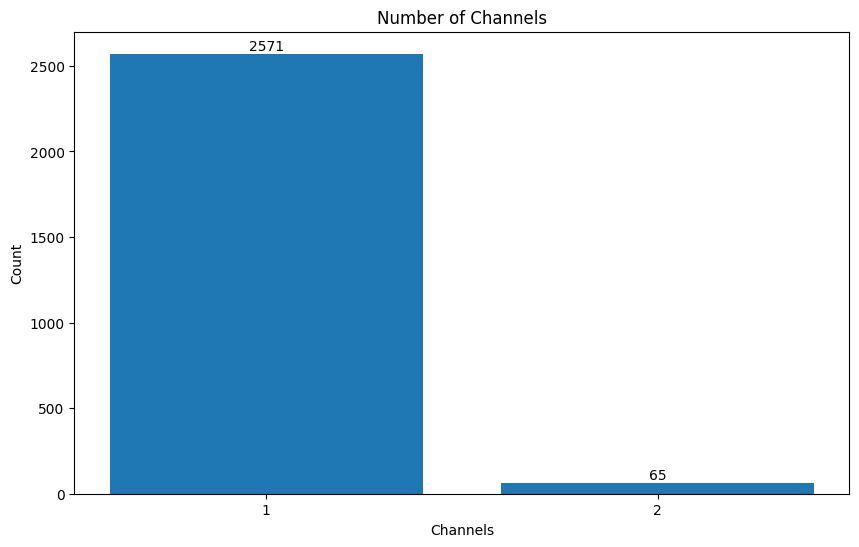

In [17]:
channels = utils.analyze_channels(audio_files)
utils.plot_channels(channels)

Considerando la prevalenza dei canali monocanali si è deciso di convertire tutti i canali a mono

# Analisi dei Bit Depth

Could not process file Dataset/Target/Tug/20171128c-28_190038.wav
Could not process file Dataset/Target/Tug/20171227a-66_110853.wav
Could not process file Dataset/Target/Tug/20171127a-24_105442.wav
Could not process file Dataset/Target/Tug/20171210-49_49.wav
Could not process file Dataset/Target/Tug/20171104-1_200959.wav
Could not process file Dataset/Target/Tug/20171128-25_052238.wav
Could not process file Dataset/Target/Tug/20171205-44_145246.wav
Could not process file Dataset/Target/Tug/20171221-61_114923.wav
Could not process file Dataset/Target/Tug/20171230a-69_163503.wav
Could not process file Dataset/Target/Tug/20171202a-38_145149.wav
Could not process file Dataset/Target/Tug/20171116-10_065145.wav
Could not process file Dataset/Target/Tug/20171203a-40_40.wav
Could not process file Dataset/Target/Tug/20171128d-29_193239.wav
Could not process file Dataset/Target/Tug/20171201d-35_125826.wav
Could not process file Dataset/Target/Tug/20171107a-6_095309.wav
Could not process file Dat

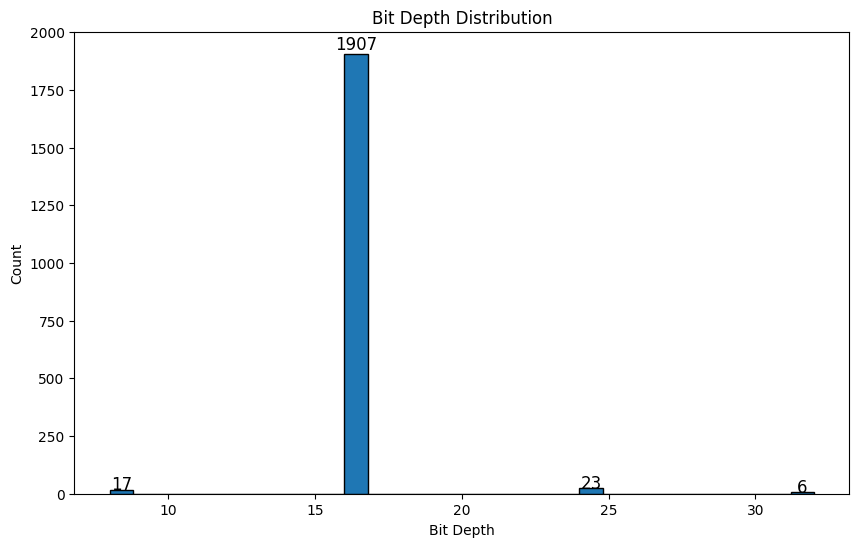

Totale skippati:  616
Totale campioni analizzati:  1953


In [31]:
import soundfile as sf
import matplotlib.pyplot as plt

import wave
import matplotlib.pyplot as plt


def analyze_and_plot_bit_depth(audio_files):
    bit_depths = []
    countskipped= 0
    totalChampions = 0
    for file in audio_files:
        if file.lower().endswith('.mp3'):  # Ignora i file .mp3
            continue
        try:
            with wave.open(file, 'rb') as wf:
                bit_depth = wf.getsampwidth() * 8  # Convert sample width to bit depth
                bit_depths.append(bit_depth)
                totalChampions = totalChampions + 1
        except:
            print(f"Could not process file {file}")
            countskipped = countskipped + 1
            continue

    # Crea un plot a barre della distribuzione delle bit depth
    plt.figure(figsize=(10, 6))
    counts, bins, patches = plt.hist(bit_depths, bins=30, edgecolor='black')
    plt.xlabel('Bit Depth')
    plt.ylabel('Count')
    plt.title('Bit Depth Distribution')

    # Aggiungi il numero di campioni per ogni classe
    bin_width = bins[1] - bins[0]  # Calculate the bin width

    for count, bin, patch in zip(counts, bins, patches):
        height = patch.get_height()
        if count > 0:
            plt.text(bin + bin_width/2, height * 1.01, str(int(count)), fontsize=12, ha='center')

    plt.show()

    #Stampa dei campioni
    print("Totale skippati: ",countskipped)
    print("Totale campioni analizzati: ", totalChampions)


# Utilizzo della funzione
audio_files = utils.get_audio_files('Dataset/df_paths.csv')
analyze_and_plot_bit_depth(audio_files)

Vista la prevalenza del bit depth a 16 bit, si è deciso di convertire tutti i file a 16 bit

# Analisi sulla distribuzione delle classi

In [9]:
import pandas as pd
import os

# Carica il DataFrame da df_paths.csv
# df_paths = pd.read_csv('Dataset/df_paths.csv', header=None, names=['path'])

# Crea una copia del DataFrame originale
df_paths_copy = df_paths.copy()

# Estrai la classe e il target dai percorsi dei file
df_paths_copy['class'] = df_paths_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_paths_copy['target'] = df_paths_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))

# Ora il DataFrame df_paths_copy contiene le nuove colonne 'class' e 'target'

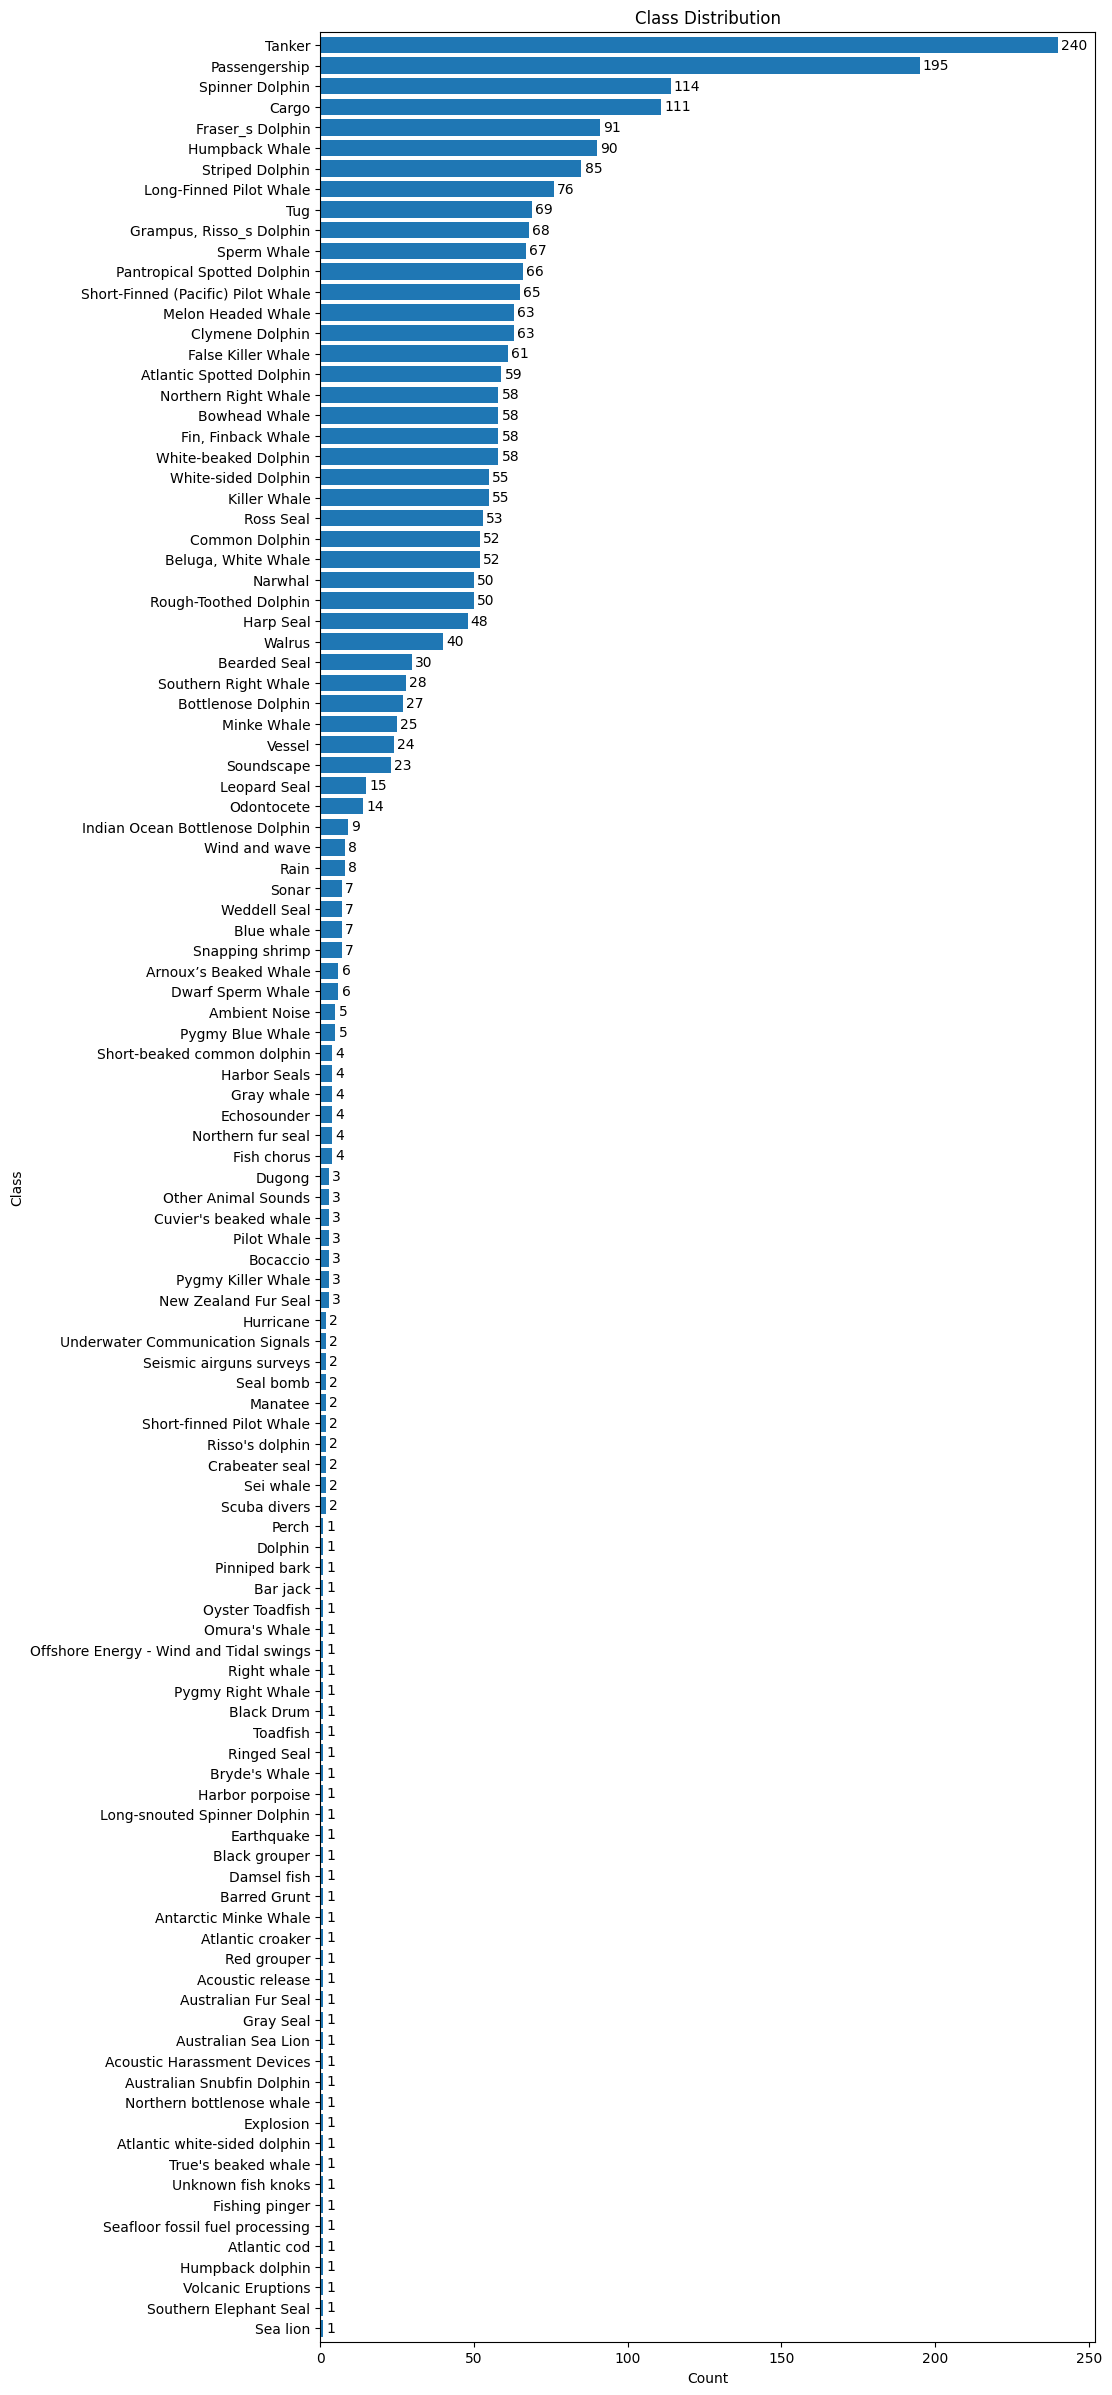

In [10]:
utils.plot_class_distribution_horizontal(df_paths_copy, 'class')

In [ ]:
#utils.plot_class_distribution(df_paths_copy, 'class')